# Heat Advection in the Gulf Stream

#### Overview:
In this notebook, we will examine the advection of heat in the Gulf Stream.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc4

## Find "Temperature Flux" Data

In this notebook, we'll use temperature flux data from the ECCO V4 state estimate. The data for this variable is here: 
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_OCEAN_3D_TEMPERATURE_FLUX_LLC0090GRID_MONTHLY_V4R4

Download one file from a month of your choosing.

## Read in the Data
For this example, read in a subset of model data in the tile corresponding to the east coast of the United States along with the variables for depth, longitude, and latitude. Begin by reading in this data below:

In [30]:
# advection: water flowing, brings heat if the water flowing through is warmer (water movement)
# diffusion: molecular movement (?) 
# implicit diffusion  

# read in your data here
ds = nc4.Dataset('OCEAN_3D_TEMPERATURE_FLUX_mon_mean_2015-08_ECCO_V4r4_native_llc0090.nc')
ADVx = ds.variables['ADVx_TH'][:,:,:,:,:]
ADVy = ds.variables['ADVy_TH'][:,:,:,:,:]
ADVr = ds.variables['ADVr_TH'][:,:,:,:,:]


DFrI = ds.variables['DFrI_TH'][:,:,:,:,:]
DFr = ds.variables['DFrE_TH'][:,:,:,:,:]
DFy = ds.variables['DFyE_TH'][:,:,:,:,:]
DFx = ds.variables['DFxE_TH'][:,:,:,:,:]

XC = ds.variables['XC'][:,:,:]
YC = ds.variables['YC'][:,:,:]
Z = ds.variables['Z'][:]
ds.close()

With a look forward to the plots we'll make next, determine the minimum and maximum of the data set:

In [19]:
# find the minimum and maximum of the data sets - what are the units?
print(ADVx[0,0,10,:,:].min(), ADVx[0,0,10,:,:].max())

-13050765.0 6190593.5


## Plot the Data
To get a feel for this data, make a couple plots! Be sure to use a **divergent colorbar** and make the minimum and maximum color bounds the same.

### Plot 1: Surface Heat Advection
Create a plot showing the northward advection field. In addition, draw a line defined by a subset of rows and columns which is across the Gulf Stream. 

/var/folders/pp/fqn1w6qs21s6c54hyr65jbwr0000gs/T/ipykernel_9424/3661841024.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(XC[10,:,:], YC[10,:,:], -ADVx[0,0,10,:,:], cmap='seismic', vmax=1.5e7, vmin=-1.5e7)


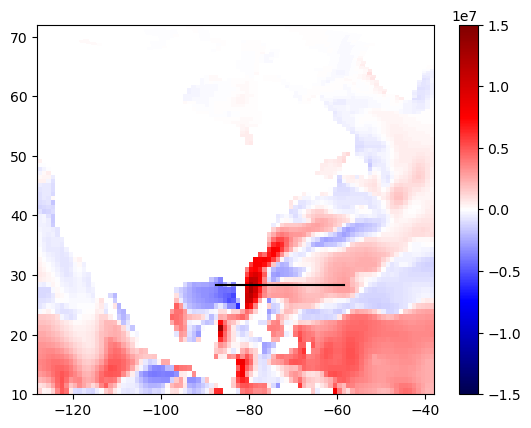

In [72]:
# define the rows and cols for the plotting line
rows = np.arange(40, 70)   # y-direction (latitude indices)
cols = np.full_like(rows, 70)  # x fixed at column 60
# plt.plot(cols, rows, 'k-', linewidth=2, label="Cross-Gulf Stream line")
plt.plot(XC[10,rows,cols], YC[10,rows, cols], 'k-')
plt.pcolormesh(XC[10,:,:], YC[10,:,:], -ADVx[0,0,10,:,:], cmap='seismic', vmax=1.5e7, vmin=-1.5e7)
plt.colorbar()
plt.show()

Make your plot here:

ValueError: cannot reshape array of size 105300 into shape (1,90)

<Figure size 640x480 with 0 Axes>

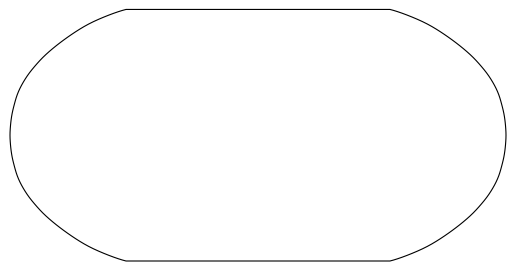

In [37]:
# make a figure object and axes
# use cartopy if you're feeling fancy
plt.figure()

# plot the advection field

# plot a  line at the rows and columns indicated


# format the axes
plt.title('Northward Heat Advection (Surface)')
plt.show()

### Plot 2: Advection Cross-Section
Plot a cross-section of the advection field along the line indicated above (using the given rows and columns). The $x$-axis should display longitude and the $y$-axis should display depth.

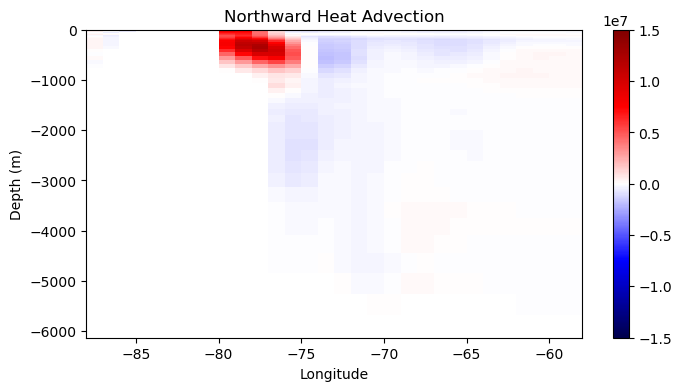

In [64]:
# make a figure object
plt.figure(figsize=(8,4))

# plot the data here
plt.pcolormesh(XC[10,rows,70], Z, -ADVx[0,:,10,rows,70].T, cmap='seismic', vmin=-1.5e7,vmax=1.5e7)

# format the axes
plt.colorbar()
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')
plt.title('Northward Heat Advection')
plt.show()

## Compute Total Northward Heat Transport
Next, let's consider how much heat is advected toward the polar regions from the tropics by the Gulf Stream. First, consider the total "temperature advection" as given by the data set. In other words, sum all of the cells in the cross-section defined above:

In [74]:
# comput the sum and print it
heat_transport_through_gulfstream = np.sum(-ADVx[0,:,10,rows,65])
print(heat_transport_through_gulfstream)

564376500.0


##### Convert to Watts
"Temperature advection" is a bit of an odd unit. A more conventional unit is Watts - the total Joules per second that pass through a given cross-section. To convert to Watts, we'll need to consider the *heat capacity* and the *density* of sea water:

$$
\begin{align*}
C_p &= 3850 \text{ J kg}^{-1}\, \,^{\circ}\text{ C}^{-1}\\
\rho_w &= 1025 \text{ kg m}^{-3}
\end{align*}
$$

In [75]:
Cp = 3850 # J / (kg C)
rho = 1025 # kg / m3

Using a dimensional analysis approach, compute the total watts of northward heat transport through the Gulf Stream.

In [76]:
W = heat_transport_through_gulfstream * Cp * rho

This number can be printed in scientific notation with the following syntax: `"{:.2E}".format(W)`

In [77]:
"{:.2E}".format(W)

'2.23E+15'

#### Putting it in context
It's hard to imagine what 10$^{15}$ W (a.k.a. a Petawatt, PW) really is. To put this in context, let's consider how it stacks up to the total flux of energy absorbed by the Earth. On each meter squared of Earth, the per-unit energy flux is:

In [80]:
S = 340 # W / m^2

Using the above value, compute the total amount of watts absorbed by the surface of the Earth. The radius of Earth is 6371 km.

In [83]:
W_earth = S * 4 * np.pi * (6371000)**2
"{:.2E}".format(W_earth)

'1.73E+17'

What percentage of Earth's absorbed energy is funneled through the Gulf Stream?

In [84]:
100 * W/W_earth

np.float32(1.28425)

That might not seem like a lot, but consider that the Gulf Stream makes up a tiny fraction of the ocean, not to mention the land masses and atmosphere!